In [1]:
import sys
import numpy as np
if "rpy2.ipython" not in sys.modules:
    %load_ext rpy2.ipython
    print("Loaded rpy2")
else:
    %reload_ext rpy2.ipython
    print("Reloaded rpy2")

Loaded rpy2


/gpfs/ysm/project/sumry2022/sumry2022_ta483/conda_envs/m154/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


Machine epsilon equals the smallest number such that (1.0 + machine epsilon) != 1.0. 

In [2]:
a = 1

while ((1+a/2) > 1):
    a = a/2

print(a)

2.220446049250313e-16


We can also query this of our operating system.

In [3]:
sys.float_info.epsilon

2.220446049250313e-16

If you subtract the binary representation of 4/3 from 7/3, then you also get the definition of machine epsilon.

In [4]:
7/3 - 4/3 - 1

2.220446049250313e-16

In [5]:
from collections import Counter
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2)) 

class KNN:
    
    def __init__(self, k=3):
        # k is the number of nearest neighbors we want to consider
        # the default is 3
        self.k = k

    def fit(self, X, y):
    #     Following the conventions of the scikit-learn library,
    #     I have a fit method. This will fit the training samples and
    #     training labels. This will usally involve the training step.
    
    #     Let us store our training variables
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(X) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # We want to compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Then we want to compute the k-nearest samples, labels
        k_indices = np.argsort(distances)[: self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Then we perform a majority vote to get the most common class label
        # The most_common() method returns a list of a tuples. The tuple
        # informs you of the most common label and the number of times it appears.
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
        

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColorMap

XKCD = pd.read_csv('../XKCD.csv')
X, y = XKCD['x'], XKCD['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1234)

In [7]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [8]:
print(predictions, y_test)

[0.45336454 0.45336454 0.45336454 0.45336454 0.45336454 0.45336454
 0.45336454] 7     0.610101
10    0.292019
4     0.794509
1     1.019166
29   -0.115251
8     0.292875
3     0.888440
Name: y, dtype: float64


In [9]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
accuracy(y_test, predictions)

0.0

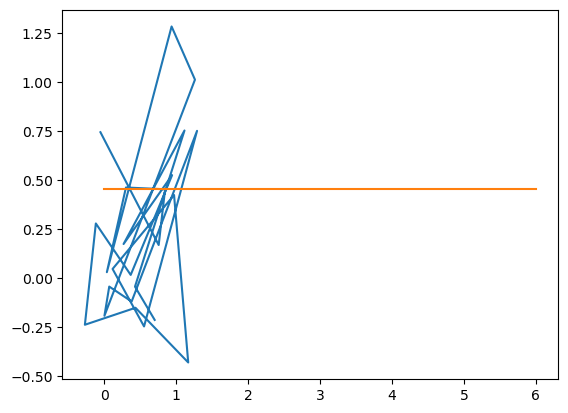

In [14]:
plt.plot(X_train,y_train,predictions)